In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/computer_vision/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# MLP

In [ ]:
!pip install pickle-mixin
!pip install gzip-reader
!pip install numpy

In [ ]:
import _pickle, gzip, urllib.request, json
import numpy as np

with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = _pickle.load(f, encoding='latin1')

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Plots confusion matrix, 
    
    cm - confusion matrix
    """
    plt.figure(1, figsize=(15, 12), dpi=160)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()  

In [ ]:
# import pickle
# import gzip

# # Load the dataset
# f = gzip.open('mnist.pkl.gz', 'rb')
# train_set, valid_set, test_set = pickle.load(f)
# f.close()


In [ ]:
# train_set 은 튜플로 두 개의 ndsarray를 원소로 가지고 있음
# print(train_set)
# print(type(train_set))
# print(len(train_set))

# 튜플을 이렇게 둘로 나눌 수 있음
X_train, y_train = train_set
X_test, y_test = test_set

# print(type(X_train))
# print(len(X_train))
# print(len(y_train))
# print(X_train)
# print(y_train)


(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8]))
<class 'tuple'>
2
<class 'numpy.ndarray'>
50000
50000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 8 4 8]


In [ ]:
import tensorflow as tf

In [ ]:
# multi-layer perceptron
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import keras

In [ ]:
seed = 7
numpy.random.seed(seed)


In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# y_test 의 column을 클래스의 갯수 지정 : 10개
num_classes = y_test.shape[1]
num_pixels = X_train.shape[1]

print(num_classes)
print(num_pixels)

10
784


In [ ]:
# build the model

start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

model2 = good_model()
# Fit the model
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
predictions = model2.predict(X_test)
Y_pred_classes = np.argmax(predictions, axis = 1)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
# print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Start learning at 2022-01-12 13:19:00.426601
Epoch 1/10
250/250 - 4s - loss: 1.3431 - accuracy: 0.6195 - val_loss: 0.6533 - val_accuracy: 0.8118 - 4s/epoch - 14ms/step
Epoch 2/10
250/250 - 3s - loss: 0.5247 - accuracy: 0.8494 - val_loss: 0.4208 - val_accuracy: 0.8786 - 3s/epoch - 11ms/step
Epoch 3/10
250/250 - 3s - loss: 0.3994 - accuracy: 0.8857 - val_loss: 0.3584 - val_accuracy: 0.8967 - 3s/epoch - 11ms/step
Epoch 4/10
250/250 - 3s - loss: 0.3529 - accuracy: 0.8981 - val_loss: 0.3252 - val_accuracy: 0.9053 - 3s/epoch - 11ms/step
Epoch 5/10
250/250 - 3s - loss: 0.3246 - accuracy: 0.9064 - val_loss: 0.2981 - val_accuracy: 0.9142 - 3s/epoch - 11ms/step
Epoch 6/10
250/250 - 3s - loss: 0.3025 - accuracy: 0.9119 - val_loss: 0.2815 - val_accuracy: 0.9193 - 3s/epoch - 11ms/step
Epoch 7/10
250/250 - 3s - loss: 0.2841 - accuracy: 0.9184 - val_loss: 0.2709 - val_accuracy: 0.9193 - 3s/epoch - 11ms/step
Epoch 8/10
250/250 - 3s - loss: 0.2676 - accuracy: 0.9229 - val_loss: 0.2578 - val_accuracy: 0

In [ ]:
y_true = np.argmax(y_test, axis = 1)
cfm = tf.math.confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))

tf.Tensor(
[[ 964    0    1    1    0    4    5    4    1    0]
 [   0 1117    2    2    1    2    3    2    6    0]
 [  14   10  940   10    9    2    9   13   22    3]
 [   3    1   17  917    2   27    1   17   20    5]
 [   2    3    4    0  924    0    9    3    4   33]
 [  10    5    2   22    8  798   13    8   18    8]
 [  15    4    6    0   11   17  903    0    2    0]
 [   3   10   16    5    5    0    0  972    1   16]
 [   7   13    5   16   13   32    9   11  861    7]
 [  13    8    1    9   28    5    0   17    5  923]], shape=(10, 10), dtype=int32)


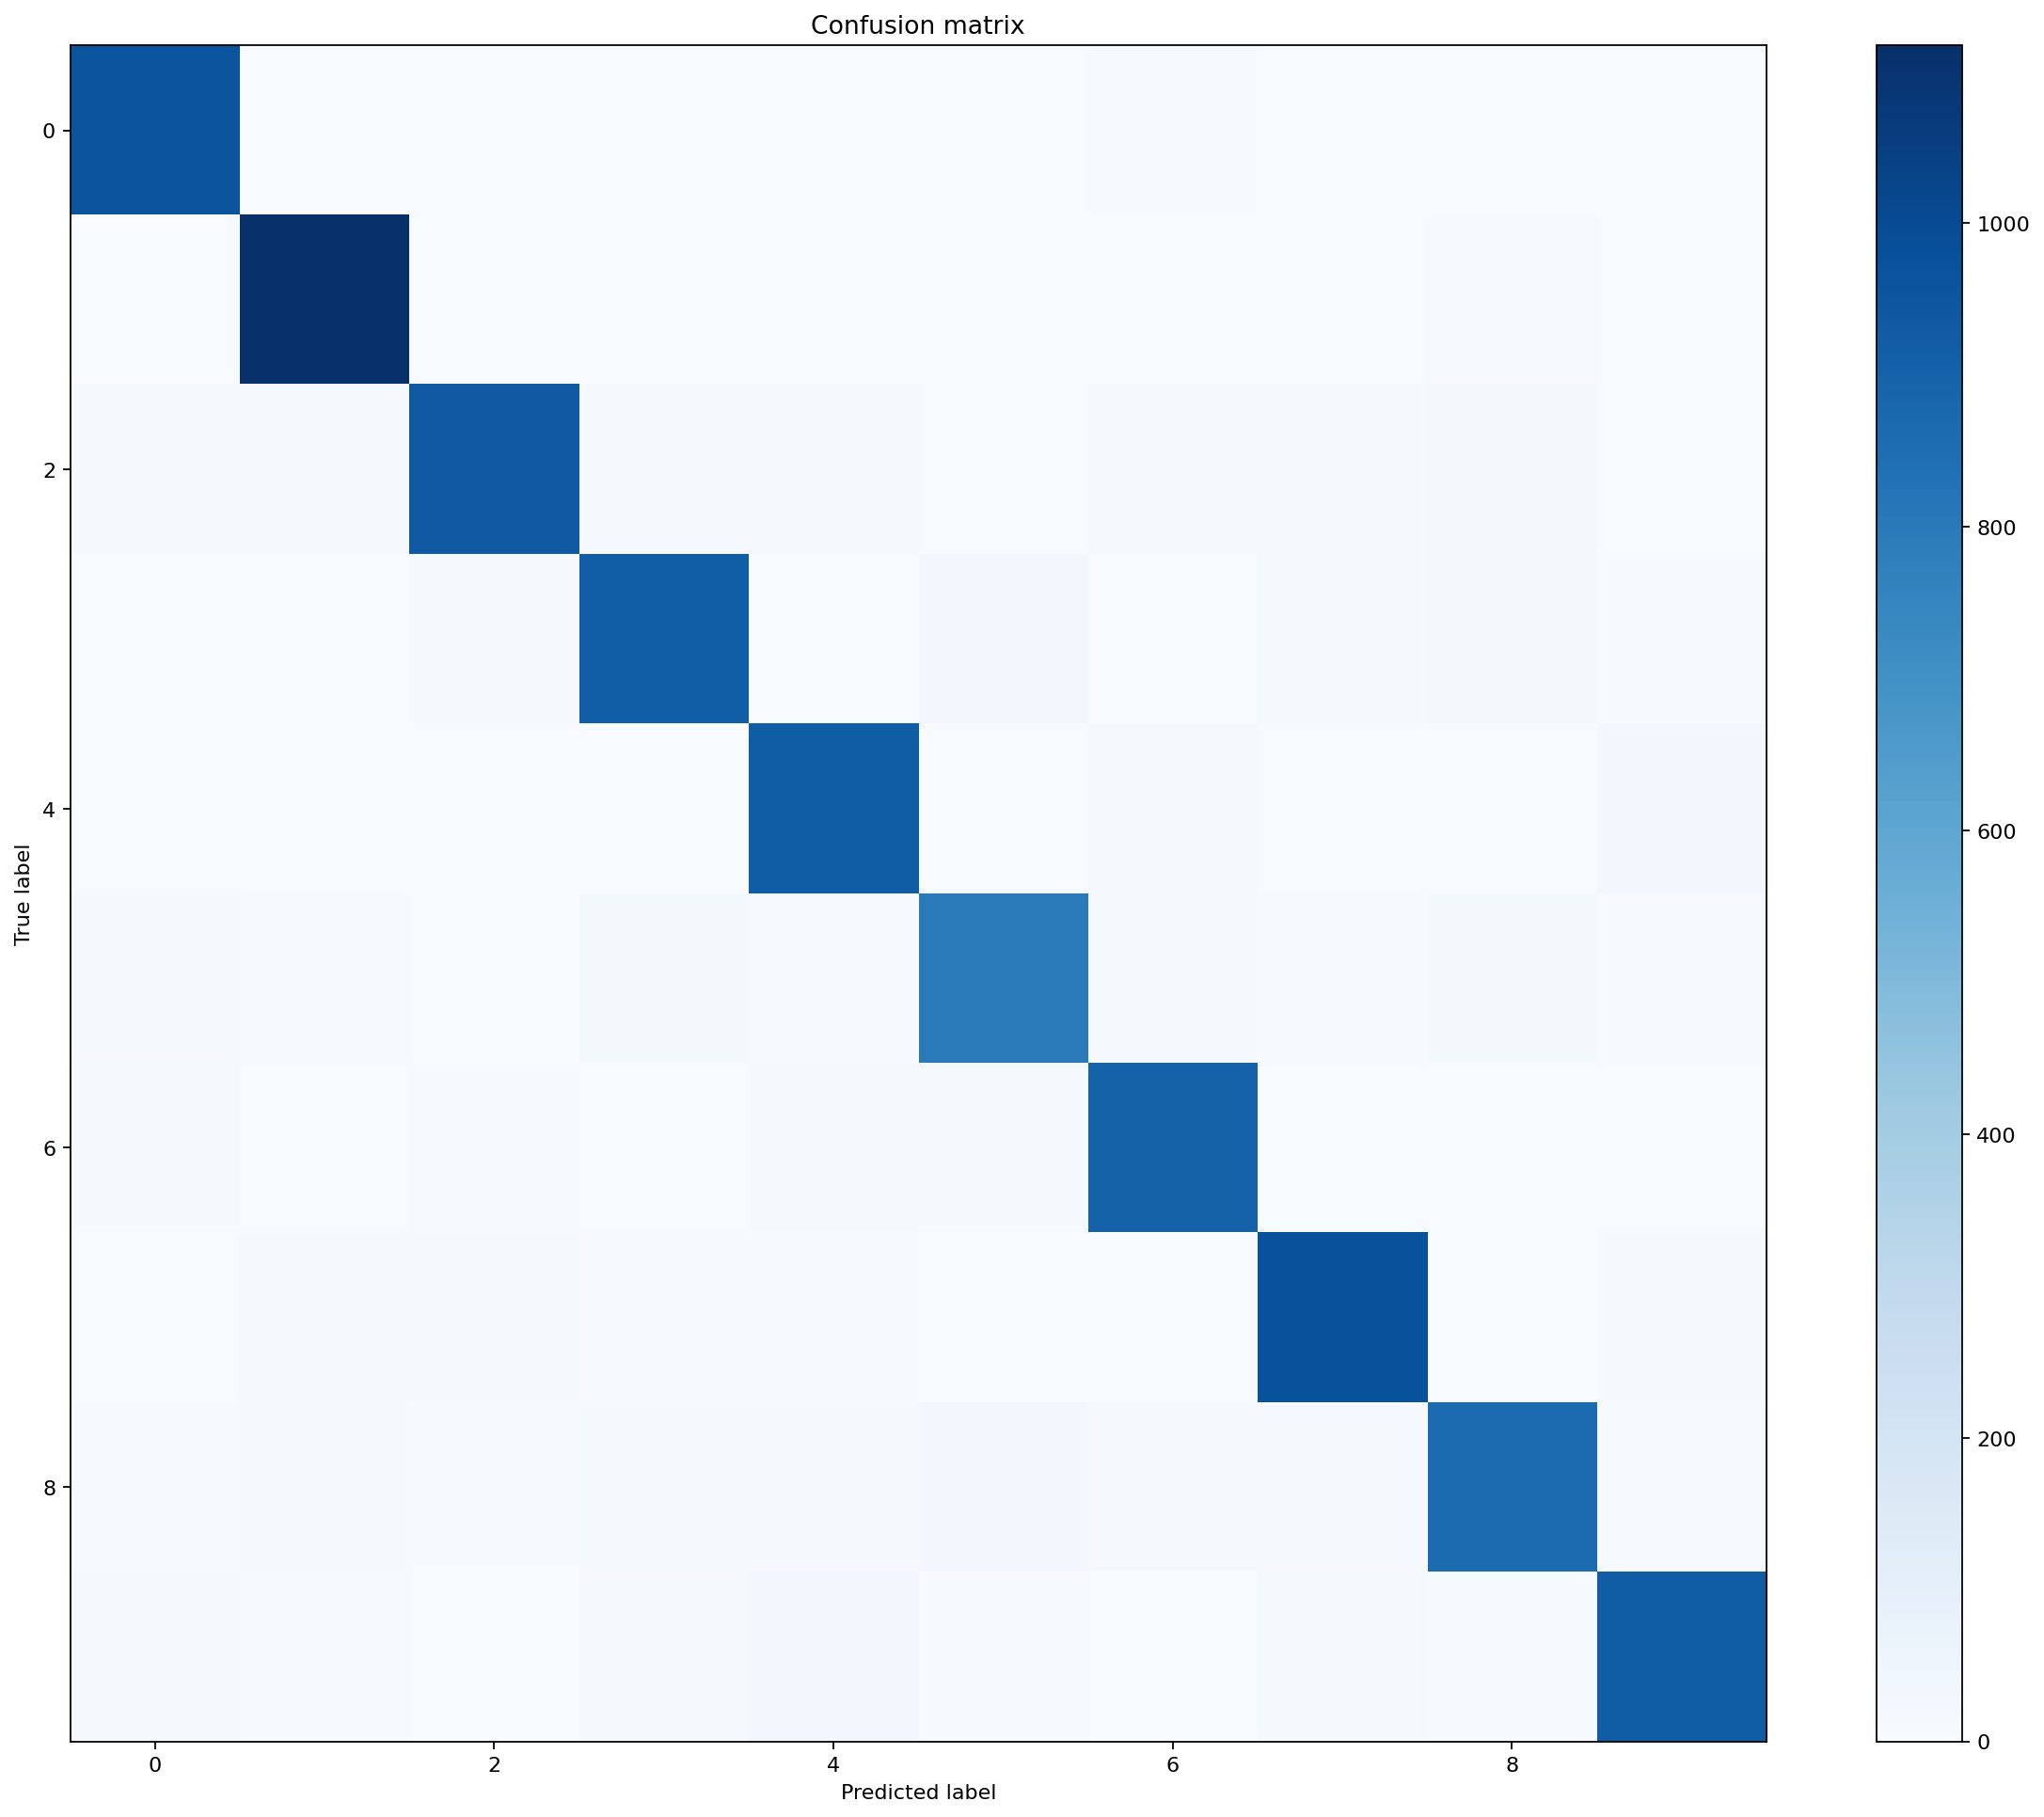

In [ ]:
print(cfm)
plot_confusion_matrix(cfm)

# SVM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
#fetch original mnist dataset
from sklearn.datasets import fetch_openml

# https://github.com/akshayr89/MNSIST_Handwritten_Digit_Recognition-SVM/blob/master/MNIST_Handwritten_Digit_Recognition-SVM.ipynb


Start learning at 2022-01-12 12:21:52.849997
Stop learning 2022-01-12 12:37:35.957769
Elapsed learning 0:15:43.107772
Classification report for classifier SVC(C=5, gamma=0.05):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.99      0.99      0.99      1205
           2       0.96      0.99      0.98      1019
           3       0.98      0.97      0.98      1081
           4       0.98      0.99      0.98       968
           5       0.99      0.98      0.99       970
           6       0.99      0.99      0.99      1009
           7       0.98      0.99      0.98      1110
           8       0.98      0.97      0.98      1016
           9       0.98      0.97      0.98      1087

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500


Confusion matrix:
[[1024    0    4    0    1    1    2    1    

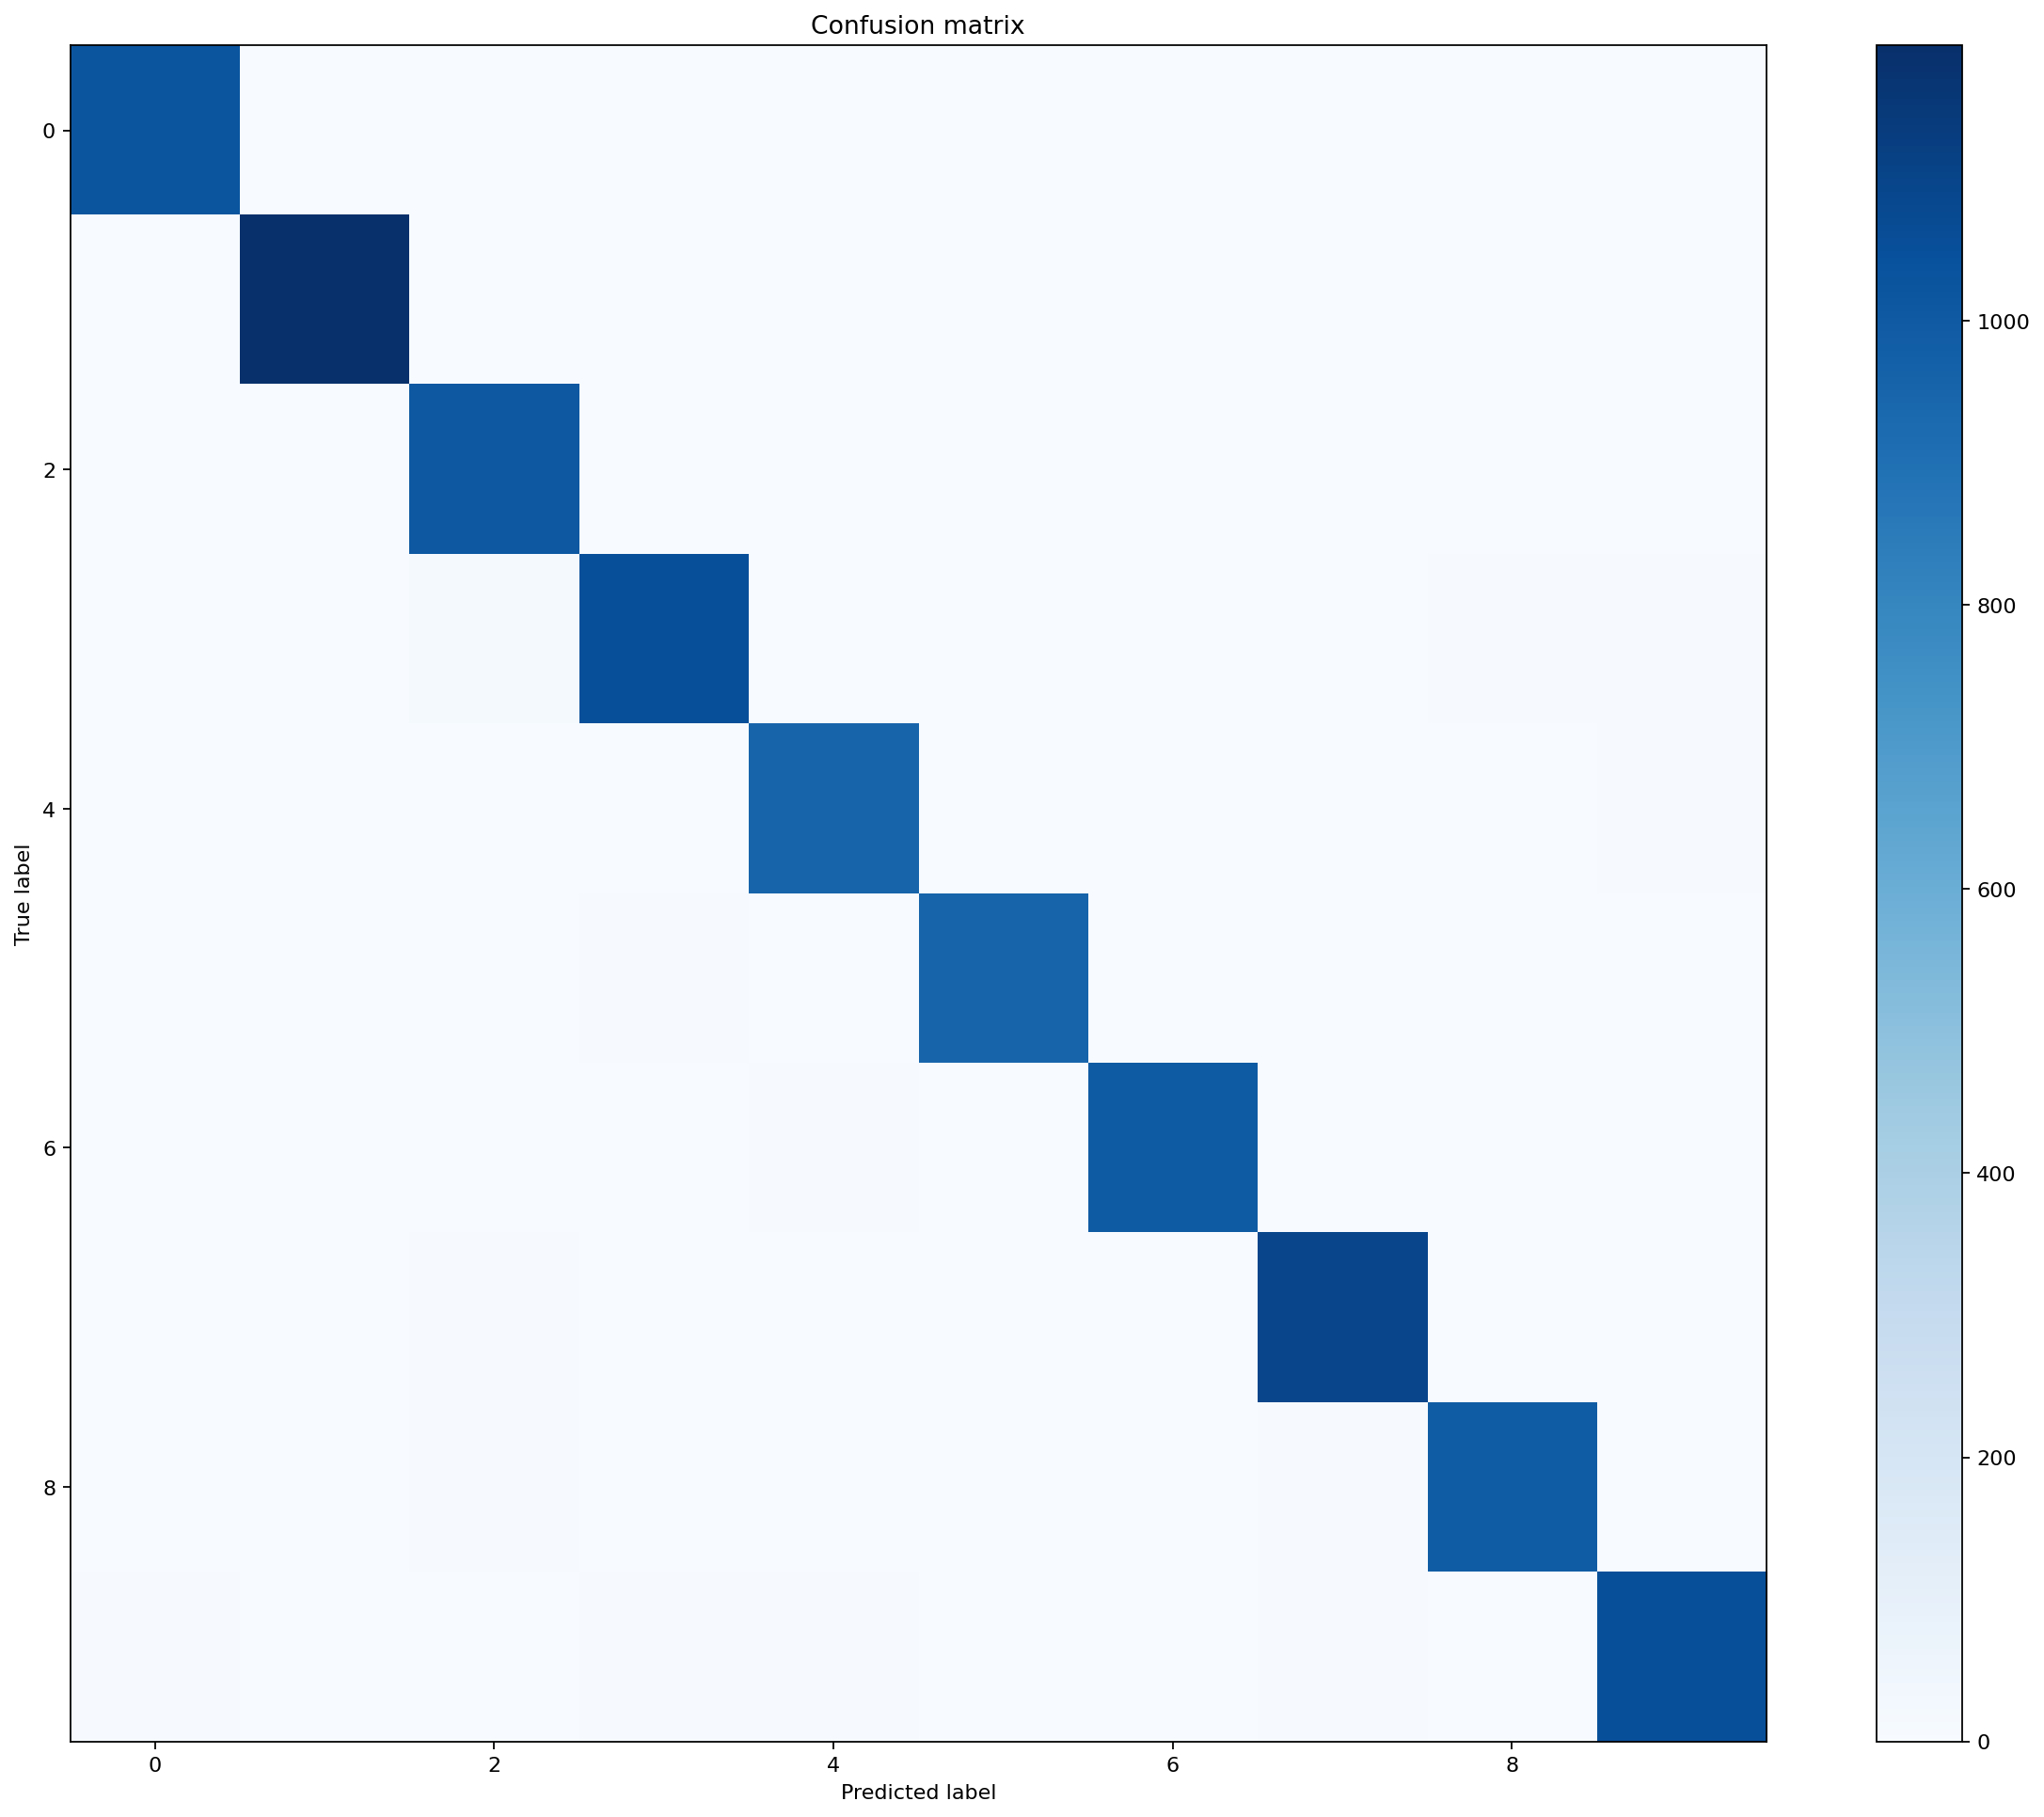

Accuracy=0.9830476190476191


In [ ]:
# it creates mldata folder in your root project folder
mnist = fetch_openml('mnist_784', cache=False)

#minist object contains: data, COL_NAMES, DESCR, target fields
#you can check it by running
mnist.keys()

#data field is 70k x 784 array, each row represents pixels from 28x28=784 image
images = mnist.data
targets = mnist.target

# Let's have a look at the random 16 images, 
# We have to reshape each data row, from flat array of 784 int to 28x28 2D array

#pick  random indexes from 0 to size of our dataset
# show_some_digits(images,targets)


#---------------- classification begins -----------------
#scale data for [0,255] -> [0,1]
#sample smaller size for testing
#rand_idx = np.random.choice(images.shape[0],10000)
#X_data =images[rand_idx]/255.0
#Y      = targets[rand_idx]

#full dataset classification
X_data = images/255.0
Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)


################ Classifier with good params ###########
# Create a classifier: a support vector classifier

param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))


########################################################
# Now predict the value of the test
expected = y_test
predicted = classifier.predict(X_test)

# show_some_digits(X_test,predicted,title_text="Predicted {}")

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

In [1]:
import math,random

class edge:

    def __init__(self):
        self.weight = None
        self.from_node = None
        self.to_node = None

class node:

    def __init__(self):

        self.value = None
        self.delta = None
        self.in_edge = []
        self.out_edge = []
        self.bias = None

    def build_in_edge(self,linked_node):
        new_edge = edge()
        new_edge.from_node = linked_node
        new_edge.to_node = self
        self.in_edge.append(new_edge)
        linked_node.out_edge.append(new_edge)

    def build_out_edge(self,linked_node):
        new_edge = edge()
        new_edge.from_node = self
        new_edge.to_node = linked_node
        self.out_edge.append(new_edge)
        linked_node.in_edge.append(new_edge)

def sigmoid(x):
    return 1/(1+math.exp(-x))

class network:

    def __init__(self,*layers):

        self.layers = []
        self.nodes = []

        for layer_id in range(0,len(layers)):
            self.layers.append([])
            for node_id in range(0,layers[layer_id]):
                new_node = node()
                self.nodes.append(new_node)
                self.layers[layer_id].append(new_node)
                if layer_id != 0:
                    for previous_layer_node in self.layers[layer_id-1]:
                        new_node.build_in_edge(previous_layer_node)

    def init_random_weights(self):
        for node in self.nodes:
            for edge in node.in_edge:
                if edge.weight == None:  
                    edge.weight = random.uniform(-1.0,1.0)
            for edge in node.out_edge:
                if edge.weight == None:
                    edge.weight = random.uniform(-1.0,1.0)
            if node not in self.layers[0]:
                node.bias = random.uniform(-1.0,1.0)
  
    def back_propagation_propagate(self,trainning_data_x):
        
        for input_layer_node_id in range(0,len(self.layers[0])):
            self.layers[0][input_layer_node_id].value = trainning_data_x[input_layer_node_id]
        
        for hiddenlayer in self.layers[1:]:
            for hiddenlayer_node in hiddenlayer:
                tmp_sum = 0
                for edge in hiddenlayer_node.in_edge:
                    tmp_sum += edge.from_node.value*edge.weight
                tmp_sum += hiddenlayer_node.bias
                hiddenlayer_node.value = sigmoid(tmp_sum)

    def back_propagation_error(self,trainning_data_y):
      
        mse = 0
        for output_node_id in range(0,len(self.layers[len(self.layers)-1])):
            mse += 0.5*(trainning_data_y[output_node_id] - self.layers[len(self.layers)-1][output_node_id].value)**2
        return mse
    
    def back_propagation_delta(self,trainning_data_y):
        for layer_id in range(len(self.layers)-1,-1,-1):
            for node_id in range(0,len(self.layers[layer_id])):
                node = self.layers[layer_id][node_id]
                if layer_id == len(self.layers)-1:
                    node.delta = (trainning_data_y[node_id] - node.value)* node.value*(1- node.value)
                else:
                    node.delta = 0
                    for edge in node.out_edge:
                        node.delta += edge.weight*edge.to_node.delta
                    node.delta = node.delta*node.value*(1-node.value)
    
    def back_propagation_update_weight(self,trainning_data_y,learning_rate):
        for layer_id in range(len(self.layers)-1,-1,-1):
            for node_id in range(0,len(self.layers[layer_id])):
                node = self.layers[layer_id][node_id]
                for edge in node.in_edge:
                    edge.weight += learning_rate*node.delta*edge.from_node.value
                if node.bias != None:
                    node.bias += learning_rate*node.delta

    def back_propagation_train(self,trainning_data,iteration):

        for iter_id in range(0,iteration):
            iter_mse = 0
            for single_data in trainning_data:
                trainning_data_x = single_data[0]
                trainning_data_y = single_data[1]
                self.back_propagation_propagate(trainning_data_x)
                iter_mse += self.back_propagation_error(trainning_data_y)
                self.back_propagation_delta(trainning_data_y)
                self.back_propagation_update_weight(trainning_data_y,0.5)
            print("iteration " + str(iter_id) +" mse:"+str(iter_mse))     
        print("trainning done")
    
    def back_propagation_predict(self,trainning_data):
        predict_data = []
        for single_data in trainning_data:
            trainning_data_x = single_data[0]
            predict_data_y = []
            self.back_propagation_propagate(trainning_data_x)
            for node_id in range(0,len(self.layers[len(self.layers)-1])):
                predict_data_y.append(self.layers[len(self.layers)-1][node_id].value)
            predict_data.append([trainning_data_x,predict_data_y])
        return predict_data
            
if __name__ == '__main__':

    trainning_data = [
        [[0,0], [0]],
        [[0,1], [1]],
        [[1,0], [1]],
        [[1,1], [0]]
    ]

    n = network(2,2,1)
    n.init_random_weights()
    n.back_propagation_train(trainning_data,3000)
    predict_data = n.back_propagation_predict(trainning_data)

    for single_data in predict_data:
        print(single_data)

iteration 0 mse:0.5327933207153361
iteration 1 mse:0.5306473547133291
iteration 2 mse:0.5291516805985567
iteration 3 mse:0.5281107069075899
iteration 4 mse:0.5273850962671761
iteration 5 mse:0.5268770349815134
iteration 6 mse:0.5265185368544052
iteration 7 mse:0.5262626598629413
iteration 8 mse:0.5260771325128031
iteration 9 mse:0.5259398291929718
iteration 10 mse:0.5258356039758947
iteration 11 mse:0.5257540960137381
iteration 12 mse:0.5256882179762936
iteration 13 mse:0.5256331192814934
iteration 14 mse:0.5255854769002197
iteration 15 mse:0.5255430110436848
iteration 16 mse:0.525504154729179
iteration 17 mse:0.5254678284164322
iteration 18 mse:0.5254332862950489
iteration 19 mse:0.5254000113988326
iteration 20 mse:0.5253676439847472
iteration 21 mse:0.5253359325763238
iteration 22 mse:0.5253047004550503
iteration 23 mse:0.5252738226877313
iteration 24 mse:0.5252432103460258
iteration 25 mse:0.5252127996411187
iteration 26 mse:0.5251825444220652
iteration 27 mse:0.5251524109799163
ite